# Binary Prediction of Poisonous Mushrooms with Machine Learning

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
train_df = pd.read_csv('raw_data/train.csv', index_col='id')
test_df = pd.read_csv('raw_data/test.csv', index_col='id')

In [40]:
train_df.shape

(3116945, 21)

In [41]:
train_df.duplicated().sum()

0

In [42]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3116945 entries, 0 to 3116944
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 object 
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), object(18)
memory usage: 523.2+ MB


In [43]:
train_df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
id,,,,,,,,,,,,,,,,,,,,,
0,e,8.80,f,s,u,f,a,c,w,4.51,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


## Data Cleansing

In [44]:
train_df.isna().sum()/train_df.shape[0]

class                   0.000000
cap-diameter            0.000001
cap-shape               0.000013
cap-surface             0.215282
cap-color               0.000004
does-bruise-or-bleed    0.000003
gill-attachment         0.168093
gill-spacing            0.403740
gill-color              0.000018
stem-height             0.000000
stem-width              0.000000
stem-root               0.884527
stem-surface            0.635514
stem-color              0.000012
veil-type               0.948843
veil-color              0.879370
has-ring                0.000008
ring-type               0.041348
spore-print-color       0.914255
habitat                 0.000014
season                  0.000000
dtype: float64

Columns which are missing over 60% of values do not seem likely to contribute much to modeling. I will drop these columns.

In [45]:
missing = train_df.isna().sum()/train_df.shape[0]

In [46]:
drop_columns = [column for column, value in missing.items() if value > 0.6]
drop_columns

['stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color']

In [47]:
train_df.drop(columns=drop_columns, inplace=True)
train_df.shape

(3116945, 16)

In [48]:
train_df.isna().sum()/train_df.shape[0]

class                   0.000000
cap-diameter            0.000001
cap-shape               0.000013
cap-surface             0.215282
cap-color               0.000004
does-bruise-or-bleed    0.000003
gill-attachment         0.168093
gill-spacing            0.403740
gill-color              0.000018
stem-height             0.000000
stem-width              0.000000
stem-color              0.000012
has-ring                0.000008
ring-type               0.041348
habitat                 0.000014
season                  0.000000
dtype: float64

Let's look at the values for some of the other columns with missing values.

In [49]:
train_df[['cap-surface']].nunique()

cap-surface    83
dtype: int64

In [50]:
train_df[['gill-attachment']].nunique()

gill-attachment    78
dtype: int64

In [51]:
train_df[['gill-spacing']].nunique()

gill-spacing    48
dtype: int64

In [35]:
train_df[['ring-type']].nunique()

ring-type    40
dtype: int64

In [37]:
train_df['gill-attachment'].unique()

array(['a', 'x', 's', 'd', 'e', nan, 'f', 'p', 'l', 'm', 'b', '32.54',
       'n', 'g', 'i', 'u', 'does-bruise-or-bleed', 't', 'o', 'c', 'w',
       '4.64', 'k', 'r', '4.77', 'h', 'p p', '7.92', 'z', 'season', 'y',
       '8.79', 'does None', 'has f', 'ring-type', '16.33', '10.85',
       '20.07', '2.82', '7.86', '3.91', 'does', '10.23', '6.74', '0.92',
       '3.45', '1', 'is a', '3.71', '50.44', '11.62', 'has d', '1.32',
       '8.47', '6.11', '2.41', '2.54', '6.32', '19.65', '15.49', '4.01',
       '8.37', 'does f', '28.7', '13.15', '1.37', '28.15', '7.09', '9.88',
       '2.67', '18.21', '1.48', '5.93', '1.51', '16.27', '11.26', '2.79',
       'is f', '13.94'], dtype=object)

For the sake of simplicity, let's impute the missing values as follows:
- Numerical columns -> Mean
- Categorical columns -> Mode

In [55]:
categorical_columns = train_df.select_dtypes(include='object').columns.to_list()
numerical_columns = train_df.select_dtypes(include=np.number).columns.to_list()

In [57]:
for column in categorical_columns:
    train_df[column].fillna(train_df[column].mode()[0], inplace=True)

In [58]:
for column in numerical_columns:
    train_df[column].fillna(train_df[column].mean(), inplace=True)

In [59]:
train_df.isna().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

## Data Preprocessing

In [75]:
(train_df['class'].value_counts()/len(train_df))*100

p    54.713702
e    45.286298
Name: class, dtype: float64

Text(0.5, 1.0, 'Class Distribution of Training Dataset')

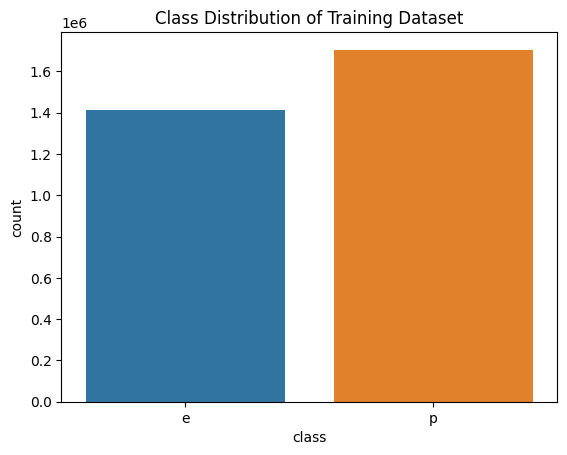

In [74]:
sns.countplot(x='class', data=train_df)
plt.title('Class Distribution of Training Dataset')

It seems the training dataset classes are relatively well balanced.
Now we need to encode the class labels, scale the numerical data, and encode the categorical data.

In [76]:
numerical_columns

['cap-diameter', 'stem-height', 'stem-width']

<Axes: >

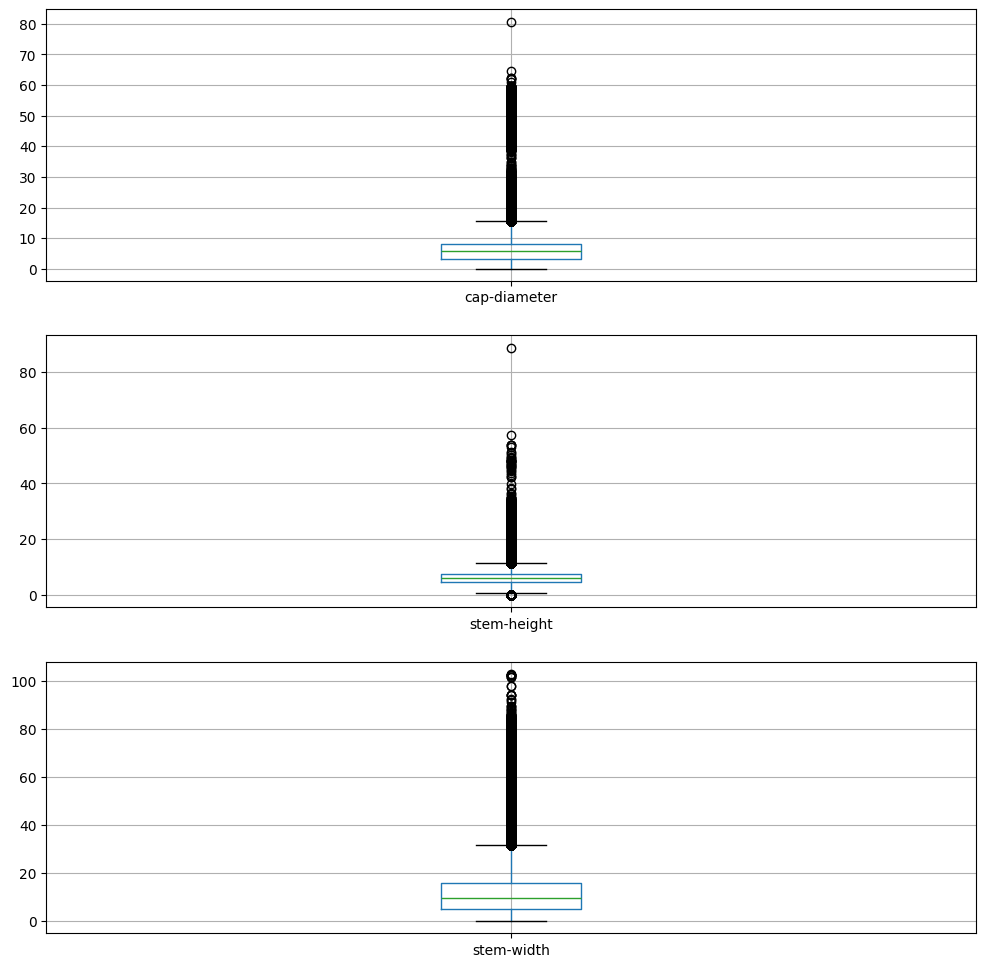

In [85]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12,12))
train_df[[numerical_columns[0]]].boxplot(ax=ax[0])
train_df[[numerical_columns[1]]].boxplot(ax=ax[1])
train_df[[numerical_columns[2]]].boxplot(ax=ax[2])

<Axes: xlabel='stem-width', ylabel='Count'>

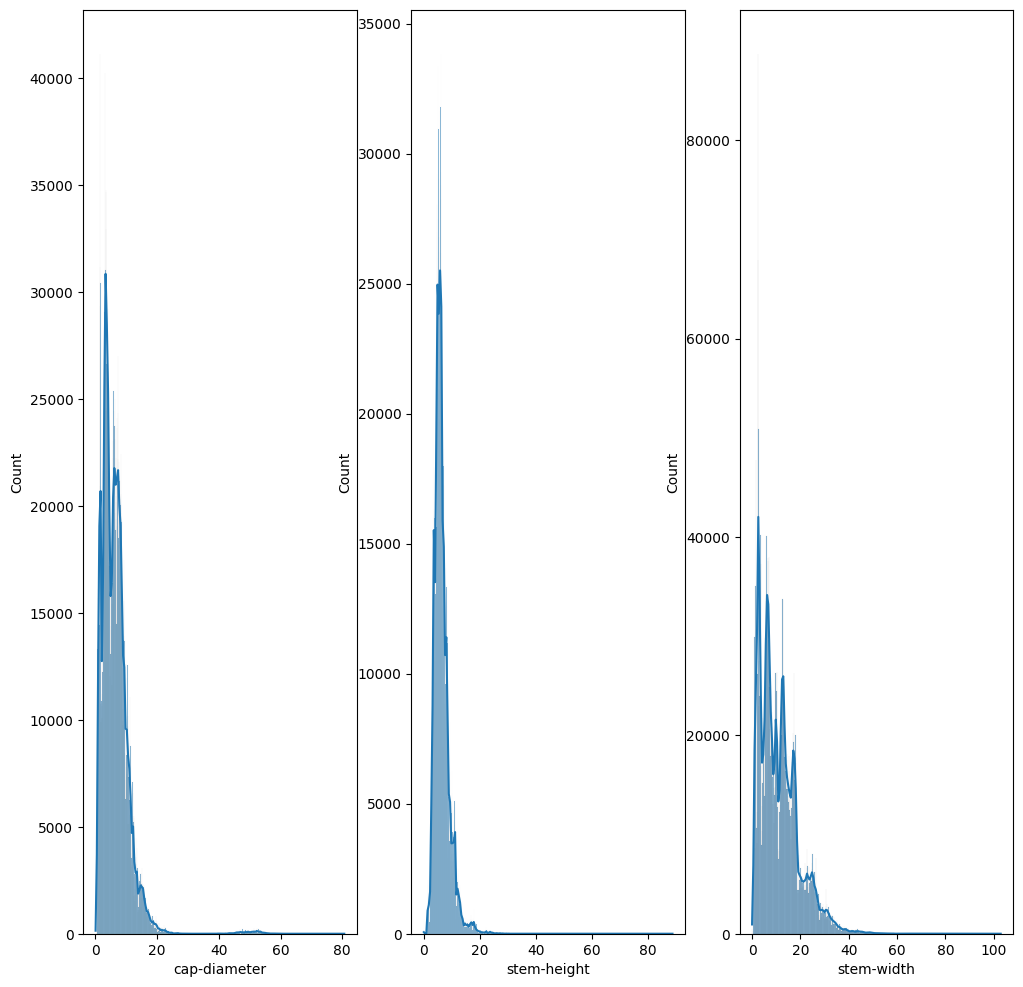

In [95]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,12))
sns.histplot(data=train_df, x=numerical_columns[0], ax=ax[0], kde=True)
sns.histplot(data=train_df, x=numerical_columns[1], ax=ax[1], kde=True)
sns.histplot(data=train_df, x=numerical_columns[2], ax=ax[2], kde=True)


It looks like these numerical columns include several outliers. Perhaps it would be best to use the RobustScaler in this case.
For the categorical columns, I will attempt to use the OneHotEncoder, but I am a bit concerned about the dimensionality of the dataset exploding
due to the large number of unique values for each column.

In [104]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

In [99]:
X = train_df.drop(columns=['class'])
y = train_df['class']

In [100]:
print(X.shape)
print(y.shape)

(3116945, 15)
(3116945,)


In [101]:
le = LabelEncoder()
le

LabelEncoder()

In [102]:
y = le.fit_transform(y)
y

array([0, 1, 0, ..., 1, 0, 1])

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(2493556, 15)
(623389, 15)


In [107]:
transformer = make_column_transformer(
    (RobustScaler(), make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(), make_column_selector(dtype_include='object'))
)
transformer

ColumnTransformer(transformers=[('robustscaler', RobustScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x17f7d9e70>),
                                ('onehotencoder', OneHotEncoder(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x17f7d9ab0>)])

In [108]:
X_train_preprocessed = transformer.fit_transform(X_train)
X_train_preprocessed.shape

(2493556, 563)

In [109]:
X_test_preprocessed = transformer.transform(X_test)
X_test_preprocessed

ValueError: Found unknown categories ['54.78', '10.46', '4.22', '17.44', '19.29', '5 f', '4.33', 'is p', '0.82', '24.16'] in column 0 during transform

Need to handle the above error:
ValueError: Found unknown categories ['54.78', '10.46', '4.22', '17.44', '19.29', '5 f', '4.33', 'is p', '0.82', '24.16'] in column 0 during transform